## Importing the dataset and reading its details

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

patients_data = pd.read_csv('The_Cancer_data_1500_To_Encode.csv')
patients_data

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58.0,1,16.085313,0,Medium,8.146251,4.148219,1,1
1,71.0,0,30.828784,0,Medium,9.361630,3.519683,0,0
2,48.0,1,38.785084,0,High,5.135179,4.728368,0,1
3,34.0,0,30.040296,0,Low,9.502792,2.044636,0,0
4,62.0,1,35.479721,0,Low,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62.0,1,25.090025,0,Low,9.892167,1.284158,0,1
1496,31.0,0,33.447125,0,Medium,1.668297,2.280636,1,1
1497,63.0,1,32.613861,1,Medium,0.466848,0.150101,0,1
1498,55.0,0,25.568216,0,Low,7.795317,1.986138,1,1


### Info about quantitative variables

In [2]:
patients_data.describe()

,Age,Gender,BMI,Smoking,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1496.000000,1500.000000,1500.000000,1500.000000,1497.000000,1497.000000,1500.000000,1500.000000
mean,50.325535,0.490667,27.513321,0.269333,4.894521,2.418865,0.144000,0.371333
std,17.639543,0.500080,7.230012,0.443761,2.867543,1.419995,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,2.434426,1.209639,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,4.830141,2.383102,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,7.408832,3.593019,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,9.994607,4.987115,1.000000,1.000000


## Dataset treatment

### Treat null values

In [3]:
patients_data.isnull().sum()

,0
Age,4
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,3
AlcoholIntake,3
CancerHistory,0
Diagnosis,0


In [4]:
mean = patients_data['Age'].dropna().mean()
patients_data['Age'] = patients_data['Age'].fillna(mean)

mean = patients_data['PhysicalActivity'].dropna().mean()
patients_data['PhysicalActivity'] = patients_data['PhysicalActivity'].fillna(mean)

mean = patients_data['AlcoholIntake'].dropna().mean()
patients_data['AlcoholIntake'] = patients_data['AlcoholIntake'].fillna(mean)

patients_data.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
AlcoholIntake,0
CancerHistory,0
Diagnosis,0


In [5]:
patients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   float64
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   object 
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 105.6+ KB


In [6]:
encoded_patients_data = patients_data.copy()
np.shape(encoded_patients_data)

(1500, 9)

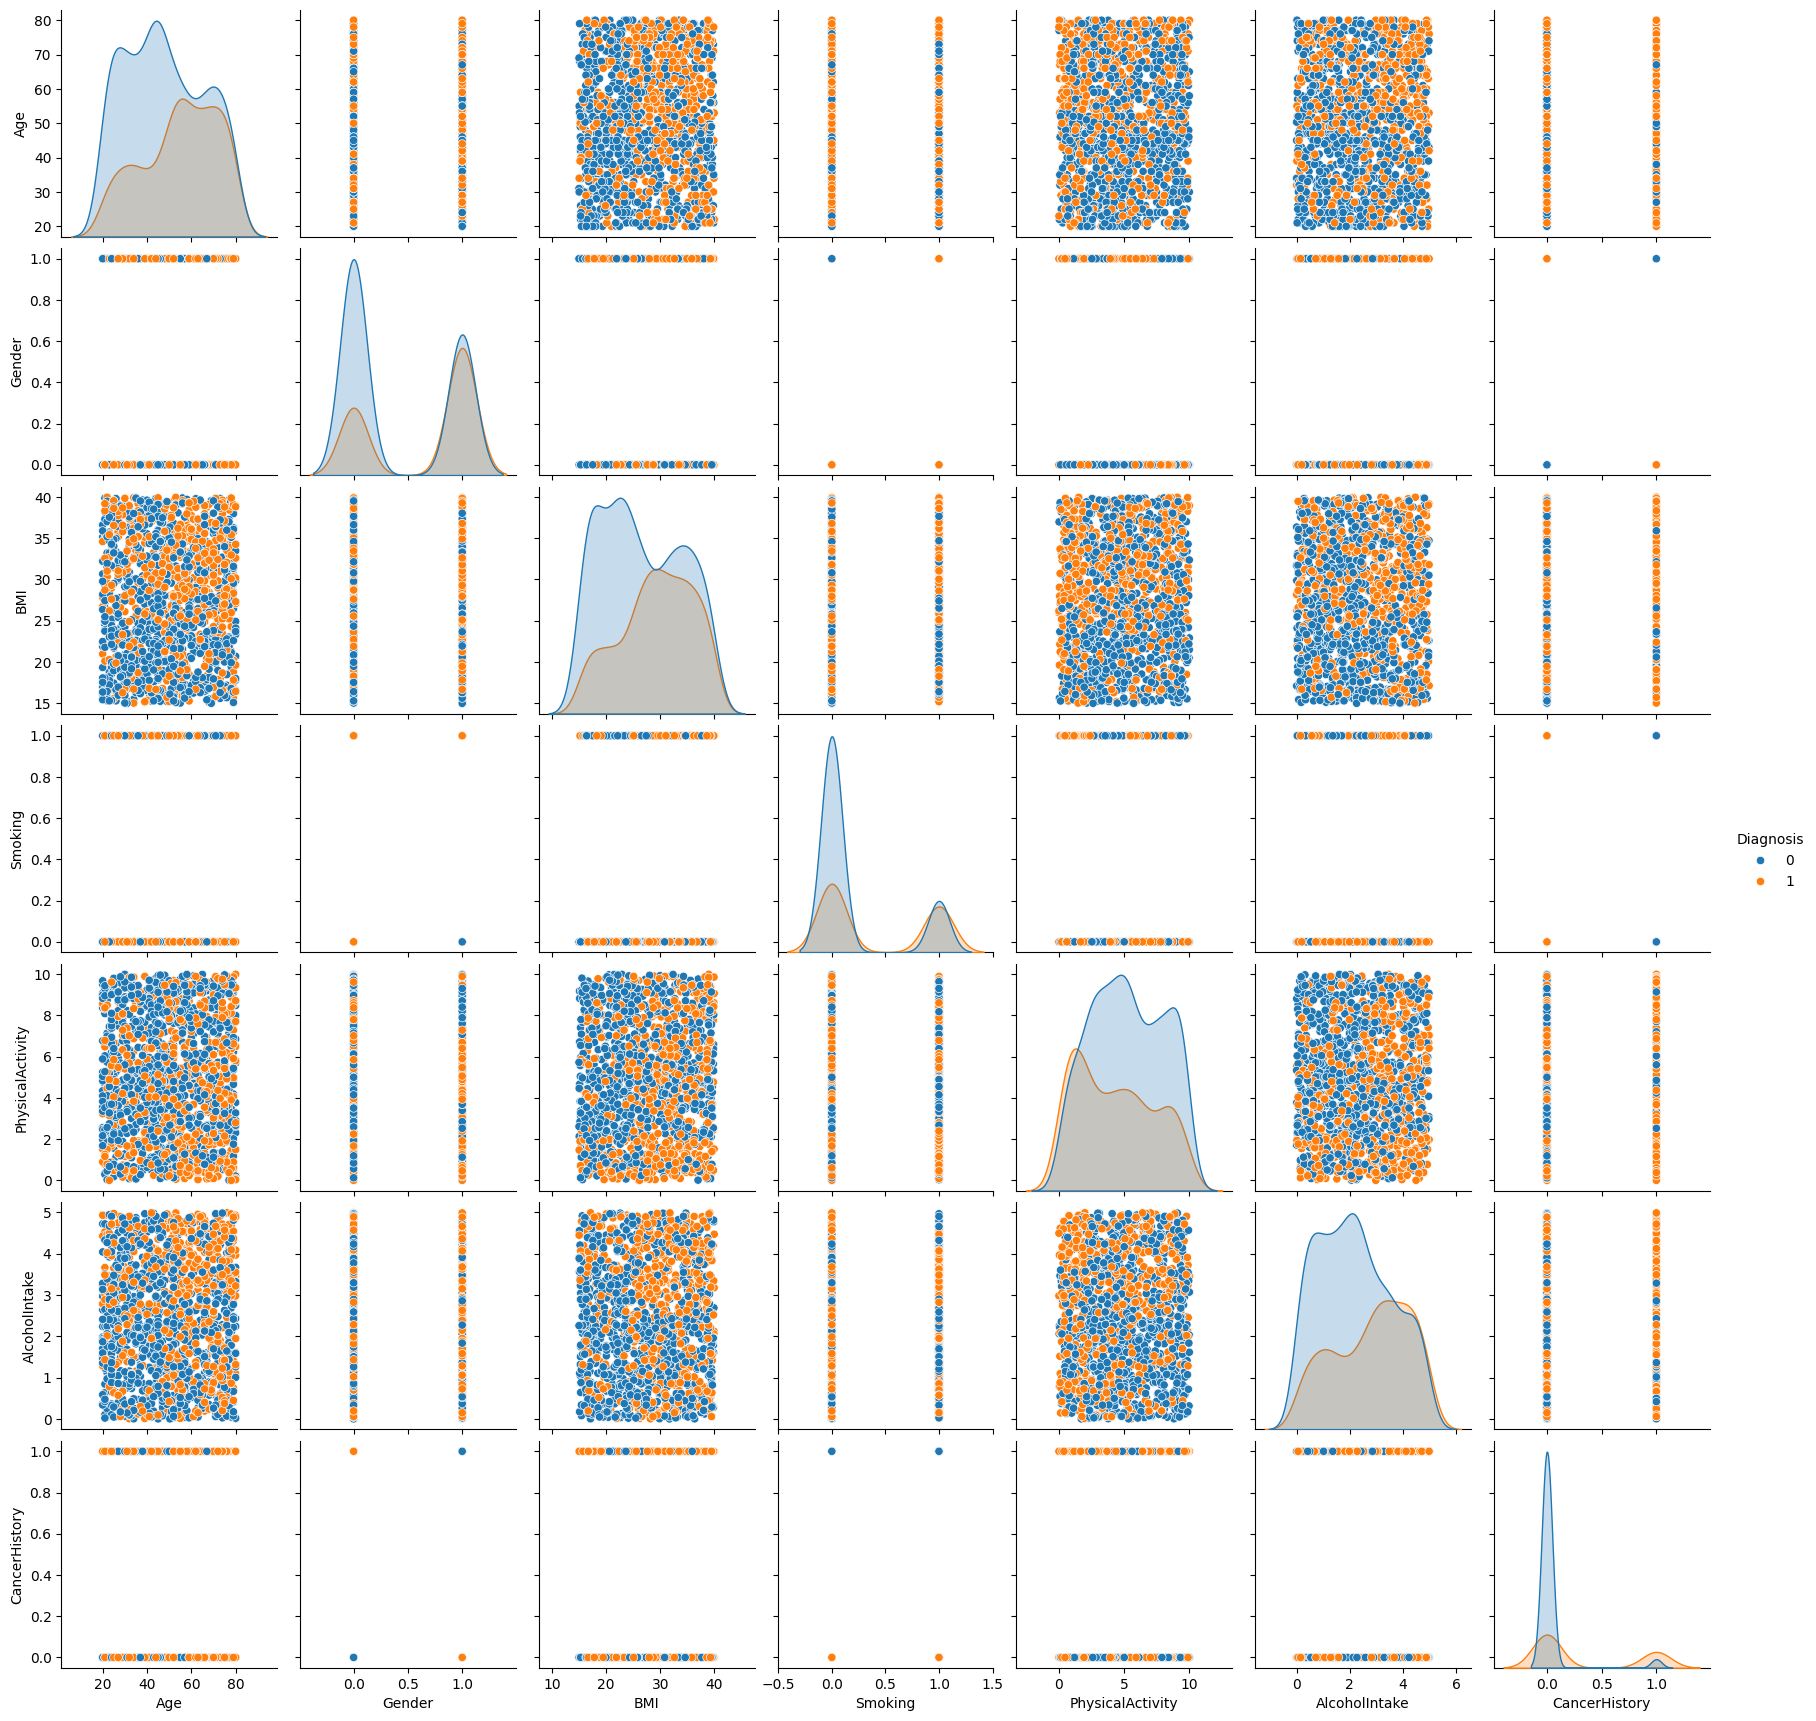

In [7]:
sns.pairplot(encoded_patients_data, hue='Diagnosis');

### Label Encoder

In [8]:
label_encoder_general_health = LabelEncoder()
print(encoded_patients_data['GeneticRisk'].unique())
encoded_patients_data['GeneticRisk'] = label_encoder_general_health.fit_transform(encoded_patients_data['GeneticRisk'])
print(encoded_patients_data['GeneticRisk'].unique())

['Medium' 'High' 'Low']
[2 0 1]


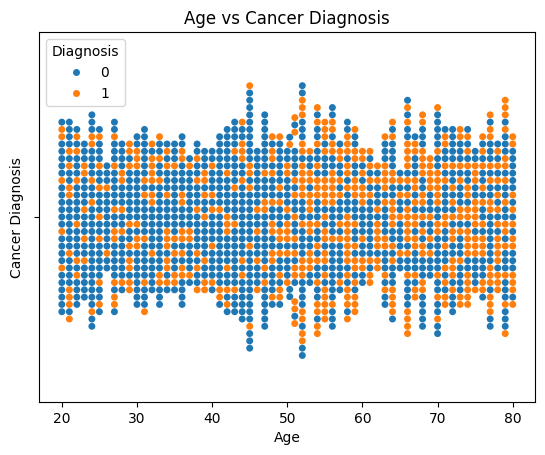

In [9]:
sns.swarmplot(x='Age', hue='Diagnosis', data=encoded_patients_data);
plt.title('Age vs Cancer Diagnosis')
plt.xlabel('Age')
plt.ylabel('Cancer Diagnosis')
plt.legend(title='Diagnosis')

plt.show()

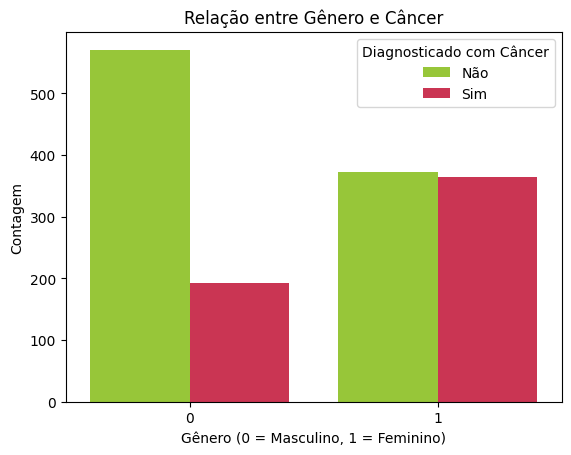

In [10]:
# Criar um gráfico de contagem
sns.countplot(data=encoded_patients_data, x='Gender', hue='Diagnosis', palette=['#9FDD22', '#E31C44'])

# Configurar o título e os rótulos
plt.title('Relação entre Gênero e Câncer')
plt.xlabel('Gênero (0 = Masculino, 1 = Feminino)')
plt.ylabel('Contagem')
plt.legend(title='Diagnosticado com Câncer', labels=['Não', 'Sim'])

# Mostrar o gráfico
plt.show()

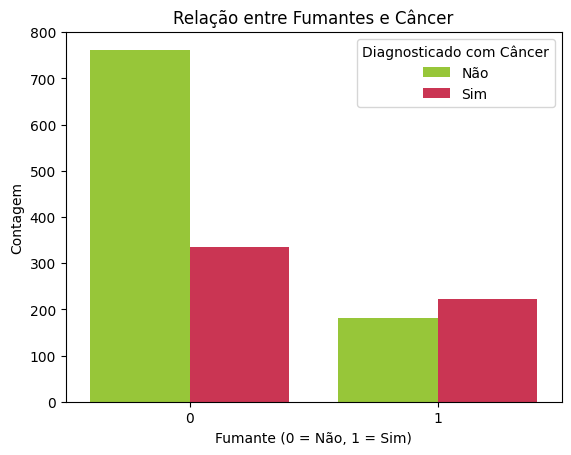

In [11]:
sns.countplot(data=encoded_patients_data, x='Smoking', hue='Diagnosis', palette=['#9FDD22', '#E31C44'])

plt.title('Relação entre Fumantes e Câncer')
plt.xlabel('Fumante (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.legend(title='Diagnosticado com Câncer', labels=['Não', 'Sim'])

plt.show()

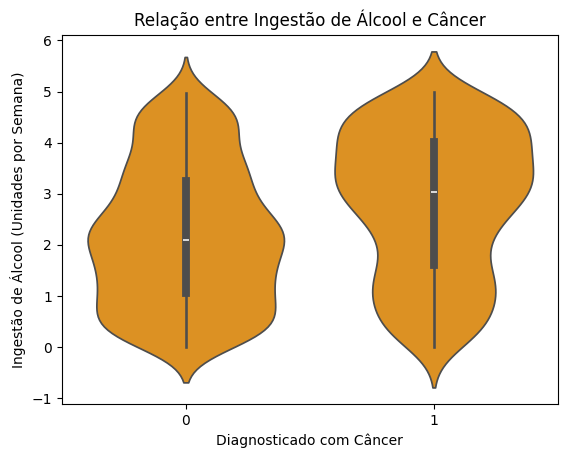

In [12]:
sns.violinplot(x='Diagnosis', y='AlcoholIntake', data=encoded_patients_data, color='#FB9704')
# sns.swarmplot(x='Diagnosis', y='AlcoholIntake', data=patients_data, color='#E31C44'

plt.title('Relação entre Ingestão de Álcool e Câncer')
plt.xlabel('Diagnosticado com Câncer')
plt.ylabel('Ingestão de Álcool (Unidades por Semana)')

plt.show()

In [13]:
# graph = px.scatter_matrix(encoded_patients_data, dimensions=['AlcoholIntake', 'PhysicalActivity', 'GeneticRisk'], color="Diagnosis", color_continuous_scale=['#9FDD22', '#E31C44'])
graph = px.scatter_matrix(encoded_patients_data, dimensions=['AlcoholIntake', 'PhysicalActivity'], color="Diagnosis", color_continuous_scale=['#82C770', '#FF129E'])

graph.show()

In [14]:
genetic_risk_distribution = np.unique(patients_data['GeneticRisk'], return_counts=True)

low_risk_perc = genetic_risk_distribution[1][0] / len(patients_data) * 100
medium_risk_perc = genetic_risk_distribution[1][1] / len(patients_data) * 100
high_risk_perc = genetic_risk_distribution[1][2] / len(patients_data) * 100

pd.DataFrame([low_risk_perc, medium_risk_perc, high_risk_perc], ['Low risk', 'Medium risk', 'High risk'])

,0
Low risk,10.533333
Medium risk,59.666667
High risk,29.800000


In [15]:
# remove colunas desnecessárias para esse gráfico
patients_data_for_tree_map = encoded_patients_data.drop(columns=['BMI', 'Age', 'AlcoholIntake', 'PhysicalActivity'], axis=1)

# treat variables to use descritive labels
patients_data_for_tree_map['Gender']  = patients_data_for_tree_map['Gender'].map({0: 'Male', 1: 'Female'})
patients_data_for_tree_map['Smoking']  = patients_data_for_tree_map['Smoking'].map({0: 'Non Smoker', 1: 'Smoker'})
patients_data_for_tree_map['GeneticRisk']  = patients_data_for_tree_map['GeneticRisk'].map({0: 'Low Genetic Risk', 1: 'Medium Genetic Risk', 2: 'High Genetic Risk'})
patients_data_for_tree_map['CancerHistory']  = patients_data_for_tree_map['CancerHistory'].map({0: 'No History', 1: 'With history'})


graph = px.treemap(patients_data_for_tree_map, path=['GeneticRisk', 'CancerHistory', 'Smoking', 'Gender'], color="Diagnosis", color_continuous_scale=['#00FF6C', '#6C00FF', '#a83259'])
graph.show()

## Data Pre processing

In [94]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer, classification_report, accuracy_score, recall_score, f1_score, precision_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


In [17]:
X = encoded_patients_data.iloc[:, 1:8].values
y = encoded_patients_data.iloc[:, 8].values

### One Hot Encoder

In [18]:
one_hot_encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [4])], remainder='passthrough')
X = one_hot_encoder.fit_transform(X).toarray()

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Data Division

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

#### Training: RandomForest

In [62]:
# criando classificador
classifier_default = RandomForestClassifier(n_estimators=50, criterion="entropy")
classifier_default.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [63]:
y_pred = classifier_default.predict(X_test)

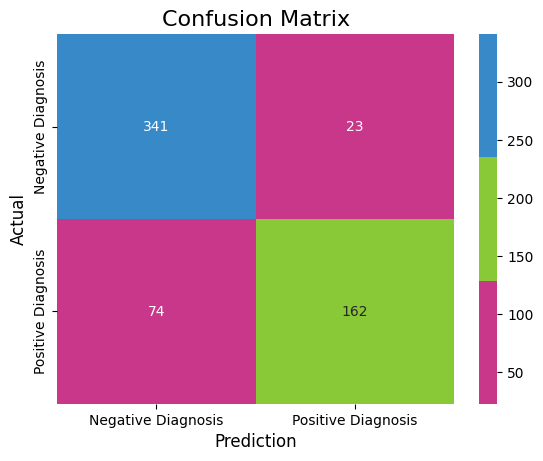

In [64]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, fmt='d', cmap=['#C83789', '#89C837', '#3789C8'], xticklabels=['Negative Diagnosis', 'Positive Diagnosis'], yticklabels=['Negative Diagnosis', 'Positive Diagnosis'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [65]:
# calculo do relatório de classificação, trazendo todas as métricas
report = classification_report(y_test, y_pred)
print(report)

# calculo das métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

pd.DataFrame([accuracy, precision, f1, recall], ['Acurácia', 'Precisão', 'F1-Score', 'Recall'])

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       364
           1       0.88      0.69      0.77       236

    accuracy                           0.84       600
   macro avg       0.85      0.81      0.82       600
weighted avg       0.84      0.84      0.83       600



,0
Acurácia,0.838333
Precisão,0.875676
F1-Score,0.769596
Recall,0.686441


#### Training: RandomForest using Cross Validation with KFold

In [69]:
kfold = KFold(n_splits=12)
classifier_kfold = RandomForestClassifier(n_estimators=50, criterion="entropy")

y_pred = cross_val_predict(classifier_kfold, X_test, y_test, cv=kfold)

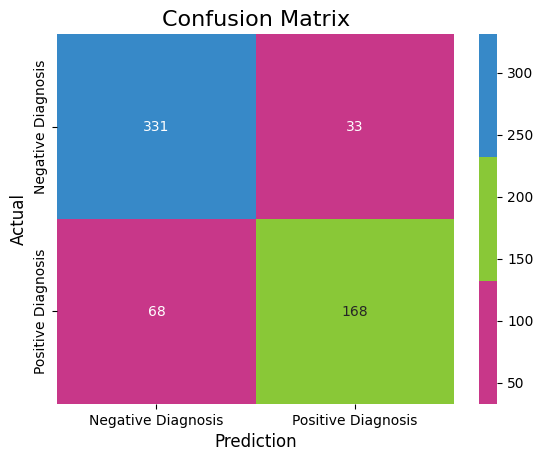

In [70]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, fmt='d', cmap=['#C83789', '#89C837', '#3789C8'], xticklabels=['Negative Diagnosis', 'Positive Diagnosis'], yticklabels=['Negative Diagnosis', 'Positive Diagnosis'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [71]:
report = classification_report(y_test, y_pred)
print(report)

# calculo das métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

pd.DataFrame([accuracy, precision, f1, recall], ['Acurácia', 'Precisão', 'F1-Score', 'Recall'])

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       364
           1       0.84      0.71      0.77       236

    accuracy                           0.83       600
   macro avg       0.83      0.81      0.82       600
weighted avg       0.83      0.83      0.83       600



,0
Acurácia,0.831667
Precisão,0.835821
F1-Score,0.768879
Recall,0.711864


#### Training: RandomForest using Cross Validation with Stratified KFold

In [73]:
skfold = StratifiedKFold(n_splits=12)
classifier_skfold = RandomForestClassifier(n_estimators=50, criterion="entropy")

y_pred = cross_val_predict(classifier_skfold, X_test, y_test, cv=skfold)

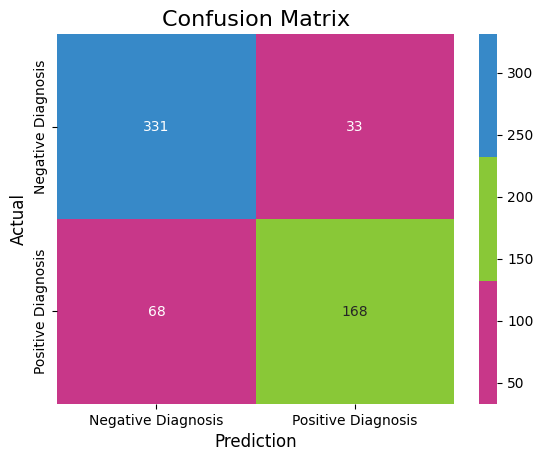

In [74]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, fmt='d', cmap=['#C83789', '#89C837', '#3789C8'], xticklabels=['Negative Diagnosis', 'Positive Diagnosis'], yticklabels=['Negative Diagnosis', 'Positive Diagnosis'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [75]:
report = classification_report(y_test, y_pred)
print(report)

# calculo das métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

pd.DataFrame([accuracy, precision, f1, recall], ['Acurácia', 'Precisão', 'F1-Score', 'Recall'])

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       364
           1       0.84      0.71      0.77       236

    accuracy                           0.83       600
   macro avg       0.83      0.81      0.82       600
weighted avg       0.83      0.83      0.83       600



,0
Acurácia,0.831667
Precisão,0.835821
F1-Score,0.768879
Recall,0.711864


#### Training: StackingClassifier

In [88]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]

classifier_default = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
classifier_default.fit(X_train, y_train)

In [91]:
y_pred = classifier_default.predict(X_test)

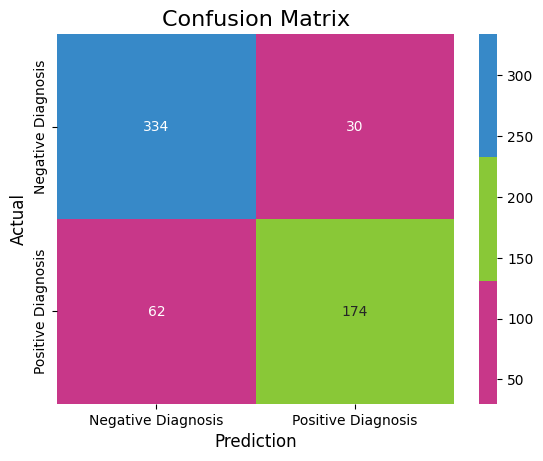

In [92]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, fmt='d', cmap=['#C83789', '#89C837', '#3789C8'], xticklabels=['Negative Diagnosis', 'Positive Diagnosis'], yticklabels=['Negative Diagnosis', 'Positive Diagnosis'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [93]:
# calculo do relatório de classificação, trazendo todas as métricas
report = classification_report(y_test, y_pred)
print(report)

# calculo das métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

pd.DataFrame([accuracy, precision, f1, recall], ['Acurácia', 'Precisão', 'F1-Score', 'Recall'])

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       364
           1       0.85      0.74      0.79       236

    accuracy                           0.85       600
   macro avg       0.85      0.83      0.83       600
weighted avg       0.85      0.85      0.84       600



,0
Acurácia,0.846667
Precisão,0.852941
F1-Score,0.790909
Recall,0.737288
